In [ ]:
%load_ext tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import random
import datetime
import tensorflow as tf

In [ ]:
!unzip /content/drive/MyDrive/images.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: images/26-Aheadonly-35/00035_00000_00017.png  
  inflating: images/26-Aheadonly-35/00035_00000_00018.png  
  inflating: images/26-Aheadonly-35/00035_00000_00019.png  
  inflating: images/26-Aheadonly-35/00035_00000_00020.png  
  inflating: images/26-Aheadonly-35/00035_00000_00021.png  
  inflating: images/26-Aheadonly-35/00035_00000_00022.png  
  inflating: images/26-Aheadonly-35/00035_00000_00023.png  
  inflating: images/26-Aheadonly-35/00035_00000_00024.png  
  inflating: images/26-Aheadonly-35/00035_00000_00025.png  
  inflating: images/26-Aheadonly-35/00035_00000_00026.png  
  inflating: images/26-Aheadonly-35/00035_00000_00027.png  
  inflating: images/26-Aheadonly-35/00035_00000_00028.png  
  inflating: images/26-Aheadonly-35/00035_00000_00029.png  
  inflating: images/26-Aheadonly-35/00035_00001_00000.png  
  inflating: images/26-Aheadonly-35/00035_00001_00001.png  
  inflating: images/26-Aheadonly

In [ ]:
!unzip /content/drive/MyDrive/UnseenImages.zip

Archive:  /content/drive/MyDrive/UnseenImages.zip
   creating: UnseenImages/
   creating: UnseenImages/00/
  inflating: UnseenImages/00/1.png   
  inflating: UnseenImages/00/4.jpeg  
  inflating: UnseenImages/00/6.jpeg  
   creating: UnseenImages/01/
  inflating: UnseenImages/01/10.png  
  inflating: UnseenImages/01/8.png   
  inflating: UnseenImages/01/9.png   
   creating: UnseenImages/02/
  inflating: UnseenImages/02/3.jpg   
  inflating: UnseenImages/02/7.jpeg  
   creating: UnseenImages/03/
  inflating: UnseenImages/03/2.jpeg  
  inflating: UnseenImages/03/5.jpeg  


In [ ]:
dataPath = '/content/images'

FileNotFoundError: ignored

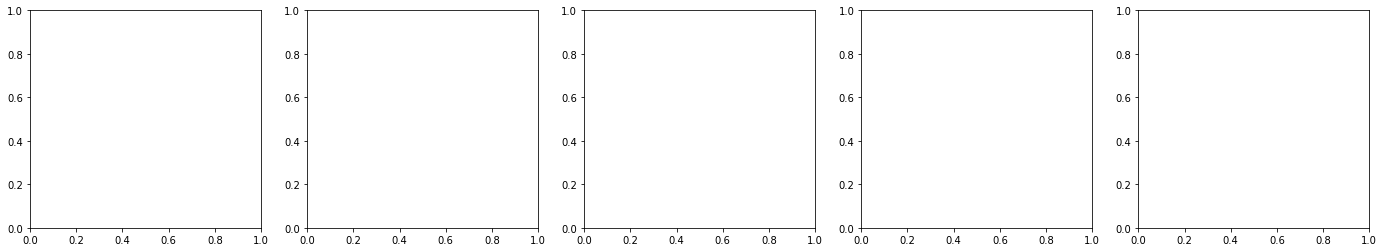

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import os

fig, axarr = plt.subplots(1, 5, figsize=(24, 4))
for i, img in enumerate(os.listdir('../content/images/11-SpeedLimit120-8')[:5]):
  axarr[i].imshow(imread('../content/images/11-SpeedLimit120-8' + img))

In [ ]:
"""
This function take the dictory-Path of images and:-
1-Read image from each category file.
2-resize images to 32x32x3.
3-labeling image:-
    0-->Stop
    1-->Do not Enter
    2-->Traffic jam is close
    3-->Yeild
4-Shuffle the array to randomized it.
5-Divide into X,Y
return X,Y
"""
def loadDataSet(dataPath):
    data = []
    imageSize = 28
    for cat in os.listdir(dataPath):
        # print(cat)
        label = int(cat[:2])
        # print(label)
        for i in os.listdir(dataPath+'/'+cat):
            # print(i)
            imagePath = dataPath+'/'+cat+'/'+i
            try:
                image = cv2.imread(imagePath,0) 
                image = cv2.resize(image,(imageSize,imageSize))
                data.append([image,label])
            except:
                pass
    
    random.shuffle(data)
    
    X = [] #image
    Y = [] #labels
    for img,l in data: 
        X.append(img)
        Y.append(l)
    print(X)
    print(Y)
    X = np.array(X)
    Y = np.array(Y).reshape(len(Y),1)
    return X,Y

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
 "/content/images",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(255, 255),
  batch_size=32)

Found 29249 files belonging to 34 classes.
Using 23400 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['00-StopSign-14', "01-Don'tEnter-17", '02-TrafficJam-26', '03-Yeild-13', '04-SpeedLimit60-3', '05-SpeedLimit20-0', '06-SpeedLimit30-1', '07-SpeedLimit50-2', '08-SpeedLimit70-4', '09-SpeedLimit80-5', '10-SpeedLimit100-7', '11-SpeedLimit120-8', '12-NoPassing-9', '13-PriorityRoad-12', '14-NoVehicles-15', '15-Veh3.5 tonsprohibited-16', '16-GeneralCaution-18', '17- Slipperyroad-23', '18-Roadwork-24', '19-Trafficsignals-26', '20-Childrencrossing-28', '21-Bicycles crossing-29', '22-Wildanimals-31', '23-Endspeedpassinglimits-32', '24-Turn right-33', '25-Turnleft-34', '26-Aheadonly-35', '27-Gostraightorright-36', '28-Gostraightorleft-37', '29-Keepright-38', '30-Keepleft-39', '31-Roundaboutmandatory-40', '32-Endofnopassing-41', '33-Endnopassingveh3.5tons-42']


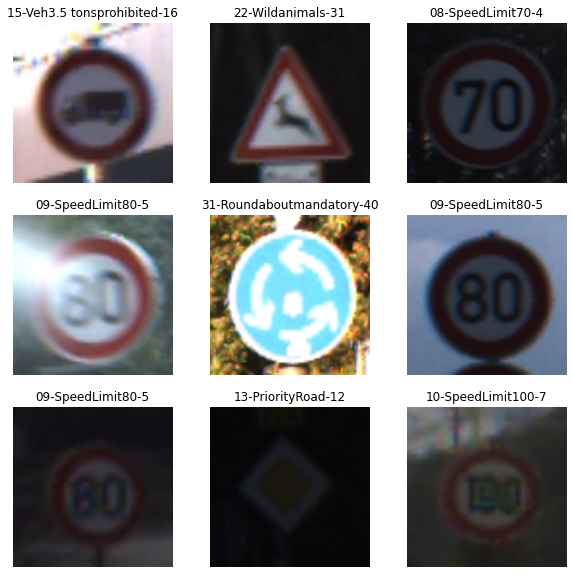

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

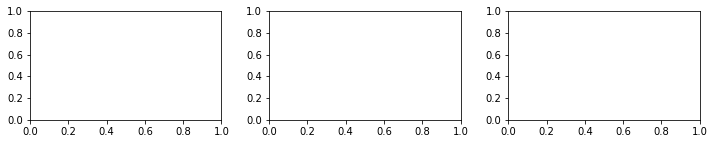

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 3, wspace=0.25, hspace=0.1)
fig = plt.figure(figsize=(12,2))
ax1, ax2, ax3 = [plt.subplot(gs[:, i]) for i in range(3)]

In [ ]:
#Load Data Set 
images,labels=loadDataSet(dataPath)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



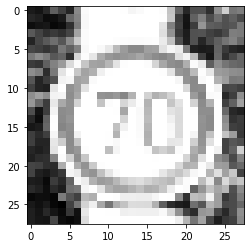

[8]


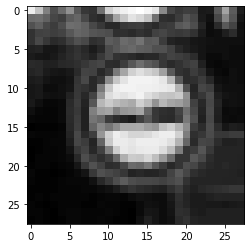

[12]


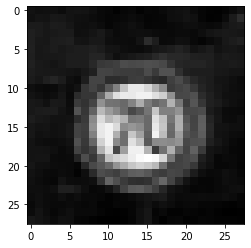

[8]


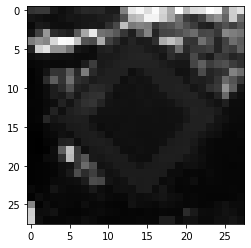

[13]


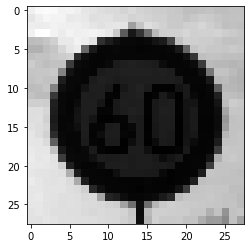

[4]


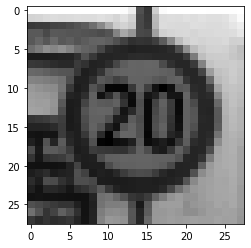

[5]


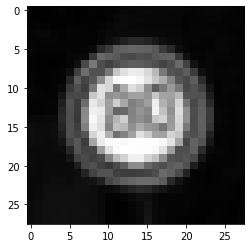

[9]


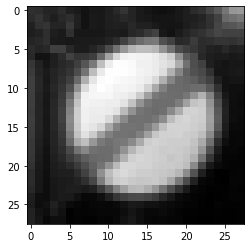

[23]


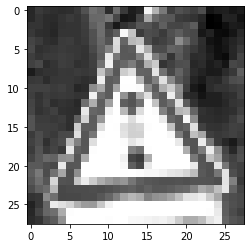

[19]


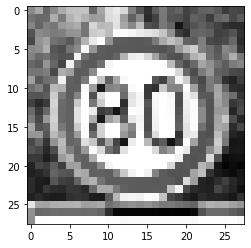

[9]


In [ ]:
#plot some examples from our images
for i in range(10):
    plt.imshow(images[i],cmap='gray')
    plt.show()
    print(labels[i])

In [ ]:
#Compute the mean and Standard Deviation , becouse we need it Later in Normalize the images 
mu=np.mean(images)
std=np.std(images)
print("The Mean=",mu)
print("The Standard Deviation=",std)

The Mean= 83.48784837405374
The Standard Deviation= 68.12569491722292


In [ ]:
images.shape

(33898, 28, 28)

In [ ]:
m=images.shape[0] # 3D Array (number of training images,)
imageShape=images.shape[1:]

In [ ]:
#Splitting Data into Training Set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=0)
print("the Number of Training Example=",x_train.shape[0])
print("the Number of Testing Example=",x_test.shape[0])

the Number of Training Example= 27118
the Number of Testing Example= 6780


In [ ]:
x_trainNorm = (x_train - mu)/std
x_testNorm  = (x_test - mu)/std
x_trainNorm = x_trainNorm.reshape(27118, 28, 28,1)
x_testNorm = x_testNorm.reshape(6780, 28, 28,1)

In [ ]:
def preprocessingImage(image=None,imageSize=28,mu=83.48784837405374,std=68.12569491722297):
    try:
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    except:
        pass
    image = cv2.resize(image,(imageSize,imageSize))
    image = (image - mu) / std
    image = image.reshape(1,imageSize,imageSize,1)
    return image

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),

    keras.layers.Conv2D(filters=512, kernel_size=(3,3)),
    keras.layers.Activation(tf.keras.activations.relu),
    keras.layers.AveragePooling2D(2),
    # keras.layers.Dropout(0.2),
 

    keras.layers.Conv2D(filters=256, kernel_size=(3,3)),
    keras.layers.Activation(tf.keras.activations.relu),
    keras.layers.AveragePooling2D(2),
    # keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3,3)),
    keras.layers.Activation(tf.keras.activations.relu),
    keras.layers.AveragePooling2D(2),
    # keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128),
    keras.layers.Activation(tf.keras.activations.relu),
    keras.layers.Dense(34),
    keras.layers.Activation(tf.keras.activations.softmax)
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 512)       5120      
                                                                 
 activation (Activation)     (None, 26, 26, 512)       0         
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 512)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       1179904   
                                                                 
 activation_1 (Activation)   (None, 11, 11, 256)       0         
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 256)        0         
 ePooling2D)                                            

In [ ]:
print(len(model.layers))

14


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import visualkeras
from PIL import ImageFont

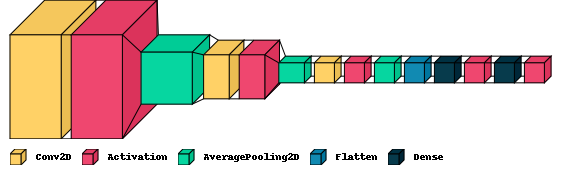

In [ ]:
visualkeras.layered_view(model, legend=True) 

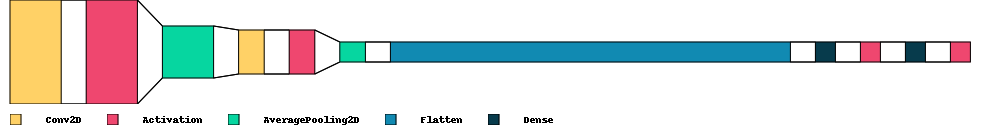

In [ ]:
visualkeras.layered_view(model, legend=True, draw_volume=False, spacing=25) 

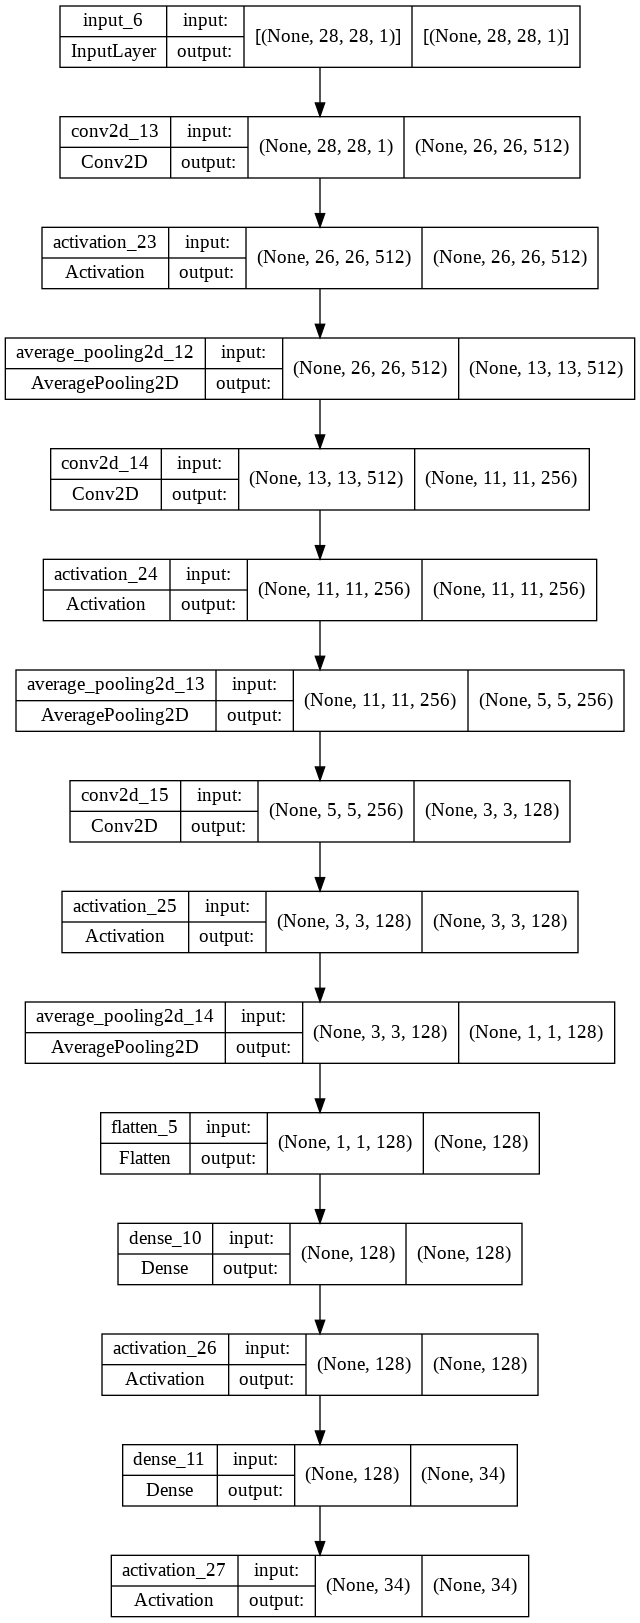

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
#Fitting 
history = model.fit(x_trainNorm,
          y_train,
          epochs = 15,
          validation_data=(x_testNorm, y_test),
          callbacks = [tensorboard_callback])

Epoch 1/15
848/848 [==============================] - 11s 12ms/step - loss: 1.4433 - accuracy: 0.5757 - val_loss: 0.4804 - val_accuracy: 0.8440
Epoch 2/15
848/848 [==============================] - 10s 11ms/step - loss: 0.3115 - accuracy: 0.9002 - val_loss: 0.2245 - val_accuracy: 0.9302
Epoch 3/15
848/848 [==============================] - 9s 11ms/step - loss: 0.1774 - accuracy: 0.9407 - val_loss: 0.1718 - val_accuracy: 0.9416
Epoch 4/15
848/848 [==============================] - 10s 12ms/step - loss: 0.1264 - accuracy: 0.9550 - val_loss: 0.1479 - val_accuracy: 0.9516
Epoch 5/15
848/848 [==============================] - 9s 11ms/step - loss: 0.1019 - accuracy: 0.9629 - val_loss: 0.1112 - val_accuracy: 0.9652
Epoch 6/15
848/848 [==============================] - 9s 11ms/step - loss: 0.0923 - accuracy: 0.9653 - val_loss: 0.1303 - val_accuracy: 0.9507
Epoch 7/15
848/848 [==============================] - 10s 12ms/step - loss: 0.0736 - accuracy: 0.9728 - val_loss: 0.0797 - val_accuracy: 0.

In [ ]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
test_scores = model.evaluate(x_testNorm, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

212/212 - 1s - loss: 0.0768 - accuracy: 0.9830 - 975ms/epoch - 5ms/step
Test loss: 0.07683531194925308
Test accuracy: 0.9830383658409119


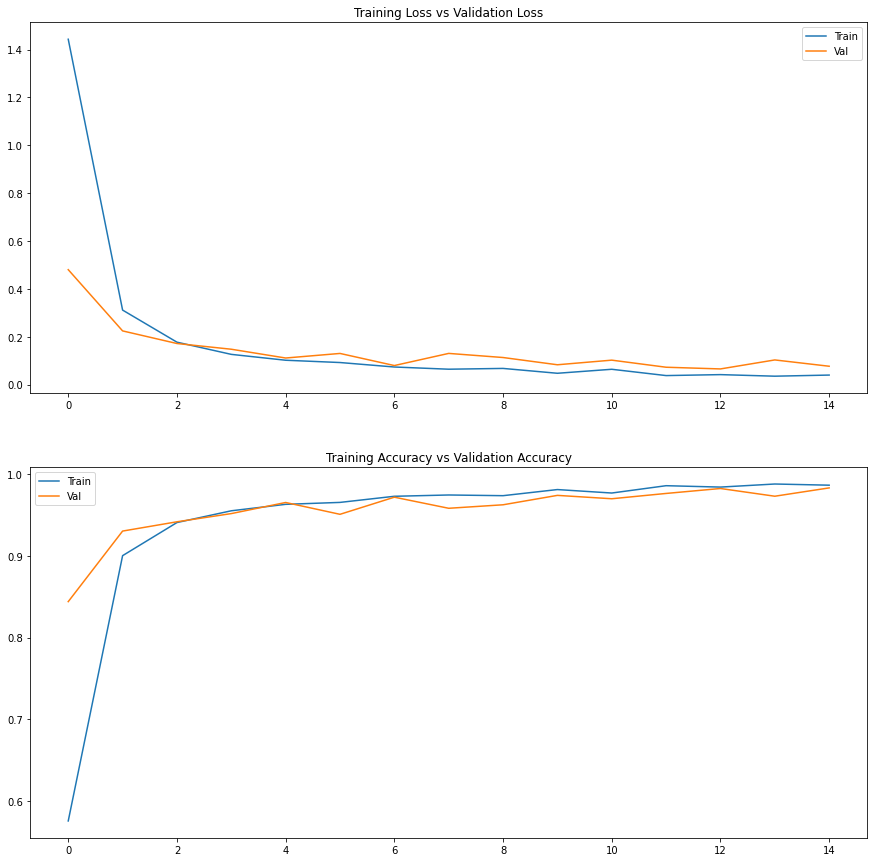

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

In [ ]:
model.save('Models/TSModel5')

INFO:tensorflow:Assets written to: Models/TSModel5/assets


In [ ]:
model=keras.models.load_model('Models/TSModel5')

тестирование на картинке

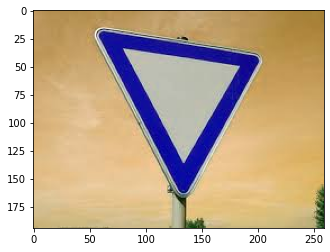

3
Stop = 0.0%
Do not Enter = 0.0%
Traffic Jam = 0.0%
Yeild = 100.0%
Speed limit 600.0%


In [ ]:
imgPath="/content/UnseenImages/03/2.jpeg"
image = cv2.imread(imgPath)
plt.imshow(image)
plt.show()
img=preprocessingImage(image)
pred=model.predict(img)*100 # 4*1

print(np.argmax(pred[0]))
print("Stop = "+str(pred[0][0])+"%")
print("Do not Enter = " + str(pred[0][1])+"%")
print("Traffic Jam = "+str(pred[0][2])+"%")
print("Yeild = "+str(pred[0][3])+"%")
print("Speed limit 60" +str(pred[0][4])+"%")

In [ ]:
# labelToText = {0: "Stop",
#                1: "Do not Enter",
#                2: "Traffic jam is close",
#                3: "Yeild",
#                4: "Speed limit (60km/h)",
#                5: "Speed limit (20km/h)",
#                6: "Speed limit (30km/h)",
#                7: "SpeedLimit50",
#                8:"SpeedLimit70",
#                9:"SpeedLimit80",
#                10:"SpeedLimit100",
#                11:"SpeedLimit120",
#                12:"NoPassing",
#                13:"PriorityRoad-",
#                14:"NoVehicles-",
#                15:"Veh3.5tonsprohibited-",
#                16:"GeneralCaution-",
#                17:"Slipperyroad-",
#                18:"Roadwork-",
#                19:"Trafficsignals-",
#                20:"Childrencrossing-",
#                21:"Bicyclescrossing-",
#                22:"Wildanimals-",
#                23:"Endspeedpassinglimits-",
#                24:"Turnright",
#                25:"Turnleft",
#                26:"Aheadonly-",
#                27:"Gostraightorright-",
#                28:"Gostraightorleft-",
#                29:"Keepright-",
#                30:"Keepleft",
#                31:"Roundaboutmandatory-",
#                32:"Endofnopassing-",
#                33:"Endnopassingveh3.5tons-"}